In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("DAGs Data.xlsx", index_col = [31, 40])
data.rename(columns={key: str(key).replace("_", " ").title() for key in data}, inplace= True)
data["General Outcome"][data["Environmental Outcome"]==1]=1
data["General Outcome"][data["Health Outcome"]==1]=1
keys = list(data.keys())
#list(data.keys())

/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [3]:
#for i in range(len(keys)):
    #print(i, keys[i])

In [4]:
years = keys[-31:]
countries = keys[-82:-31]
data.rename(columns = {year:str(year) for year in years}, inplace = True)
years = [str(year) for year in years]
data

Unnamed: 0  \
Loc_experiment Year               
ARGENTINA      2005          19   
               2017          29   
               2015          32   
               1997          42   
               2012          60   
...                         ...   
USA            2005         478   
               2019         486   
               2019         487   
               2018         491   
               2019         492   

                                                         Article Title  \
Loc_experiment Year                                                      
ARGENTINA      2005  Effect of the herbicide glyphosate on liver li...   
               2017  Glyphosate and Aminomethylphosphonic acid (AMP...   
               2015  Studies of Acute and Chronic Toxicity of Comme...   
               1997  Effects of Technical Grade and a Commercial\nF...   
               2012  Glyphosate-based Herbicide - a Genotoxic but n...   
...                                                                ...   
USA            2005  Cancer Incidence among Glyphosate-Exposed Pest...   
               2019  Effects of glyphosate and aminomethylphosphoni...   
               2019  Developmental and epigenetic effects of Roundu...   
               2018  Glyphosate perturbs the gut microbiota of hone...   
               2019  Assessment of Glyphosate Induced Epigenetic Tr...   

                                                          Article Link  \
Loc_experiment Year                                                      
ARGENTINA      2005  https://www.sciencedirect.com/science/article/...   
               2017  https://www.sciencedirect.com/sdfe/pdf/downloa...   
               2015  https://www.hilarispublisher.com/open-access/s...   
               1997  https://link.springer.com/article/10.1007%2Fs0...   
               2012  https://www.ejso.com/article/S0748-7983(12)006...   
...                                                                ...   
USA            2005                   https://doi.org/10.1289/ehp.7340   
               2019       https://doi.org/10.1016/j.toxlet.2018.12.013   
               2019      https://doi.org/10.1016/j.aquatox.2019.03.005   
               2018            https://doi.org/10.1073/pnas.1803880115   
               2019  https://www.nature.com/articles/s41598-019-428...   

                     General Outcome  General Outcome (1,0)  \
Loc_experiment Year                                           
ARGENTINA      2005                1                      1   
               2017                1                      1   
               2015                1                      1   
               1997                1                      1   
               2012                0                      0   
...                              ...                    ...   
USA            2005                0                      0   
               2019                0                      0   
               2019                1                      1   
               2018                1                      1   
               2019                1                      1   

                                                  Desc General Outcome  \
Loc_experiment Year                                                      
ARGENTINA      2005  Health risk associated with exposure during pr...   
               2017           In the dust which is potentially harmful   
               2015                               Harmful to organisms   
               1997                                           Ecotoxic   
               2012                       Not an epigenetic carcinogen   
...                                                                ...   
USA            2005  Glyphosate exposure was not associated with ca...   
               2019                   Safe at recommended usage levels   
               2019                             Adverse effect on fish   
     

In [45]:
keys =["General Outcome",
       #'Num Citations',
       #"Impact F Publishing Year",
       #"Private",
       #"Public",
       #"International",
       #"University",
       'Private Affiliation',
       'Public Affiliation',
       'University Affiliation',
       #"Herbicide Use",
       #"Herbicide Use/Year"
      ]
keys = keys #+ countries
#keys = ["General_outcome", "Year", "Fund_Source", "Loc_experiment", "Journal"]
max_cond_vars = len(keys) - 2
data_reg = data[keys].dropna()
#data_reg["Impact F Publishing Year"] = data_reg["Impact F Publishing Year"].astype(float)
#data_reg["Num Citations"] = data_reg["Num Citations"].astype(float)
data_reg.dtypes

General Outcome           int64
Private Affiliation       int64
Public Affiliation        int64
University Affiliation    int64
dtype: object

In [46]:
import pingouin
from pgmpy.estimators import PC
c = PC(data_reg[keys].dropna())
max_cond_vars = len(keys) - 2

sig =0.10
model = c.estimate(return_type = "dag", variant = "parallel", 
                   significance_level = sig, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()
pcorr = data_reg.pcorr()
weights = {}

  0%|          | 0/2 [00:00<?, ?it/s]

In [47]:
pcorr

,General Outcome,Private Affiliation,Public Affiliation,University Affiliation
General Outcome,1.000000,-0.192895,-0.073873,0.045642
Private Affiliation,-0.192895,1.000000,-0.316827,-0.359847
Public Affiliation,-0.073873,-0.316827,1.000000,-0.589608
University Affiliation,0.045642,-0.359847,-0.589608,1.000000


In [48]:
data_reg.corr()

,General Outcome,Private Affiliation,Public Affiliation,University Affiliation
General Outcome,1.000000,-0.210914,-0.097119,0.157779
Private Affiliation,-0.210914,1.000000,-0.114631,-0.251312
Public Affiliation,-0.097119,-0.114631,1.000000,-0.543516
University Affiliation,0.157779,-0.251312,-0.543516,1.000000


In [49]:
undirected_graph = {key:[] for key in data_reg.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in data_reg.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'General Outcome': ['Private Affiliation',
  'Public Affiliation',
  'University Affiliation'],
 'Private Affiliation': ['General Outcome',
  'Public Affiliation',
  'University Affiliation'],
 'Public Affiliation': ['General Outcome',
  'Private Affiliation',
  'University Affiliation'],
 'University Affiliation': ['General Outcome',
  'Private Affiliation',
  'Public Affiliation']}

OutEdgeView([('Public Affiliation', 'University Affiliation'), ('General Outcome', 'University Affiliation'), ('General Outcome', 'Public Affiliation')])

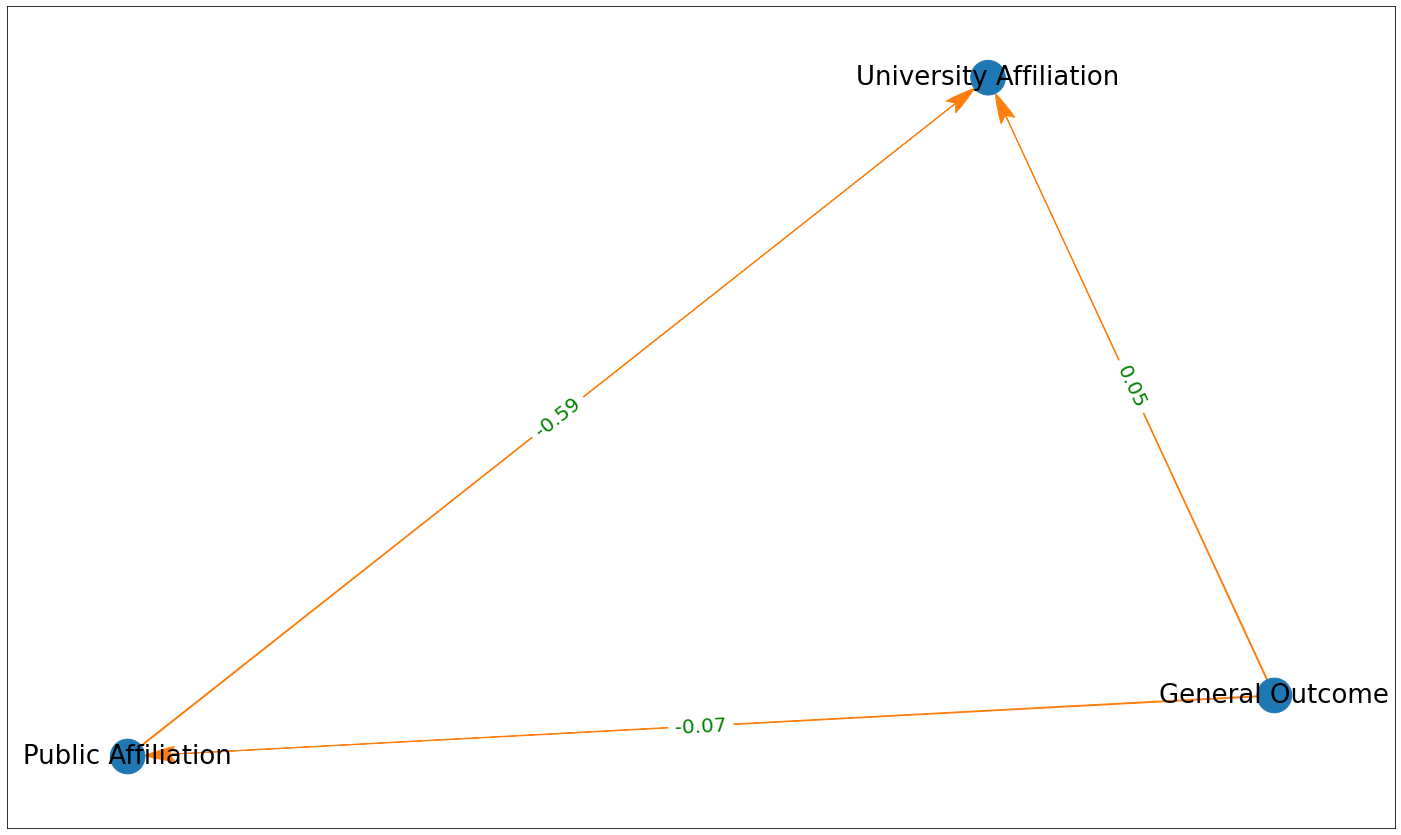

In [50]:
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import networkx as nx
def graph_DAG(edges, data_reg, title = ""):
    pcorr = data_reg.pcorr()
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
plt.close()
graph_DAG(edges, data_reg)
edges

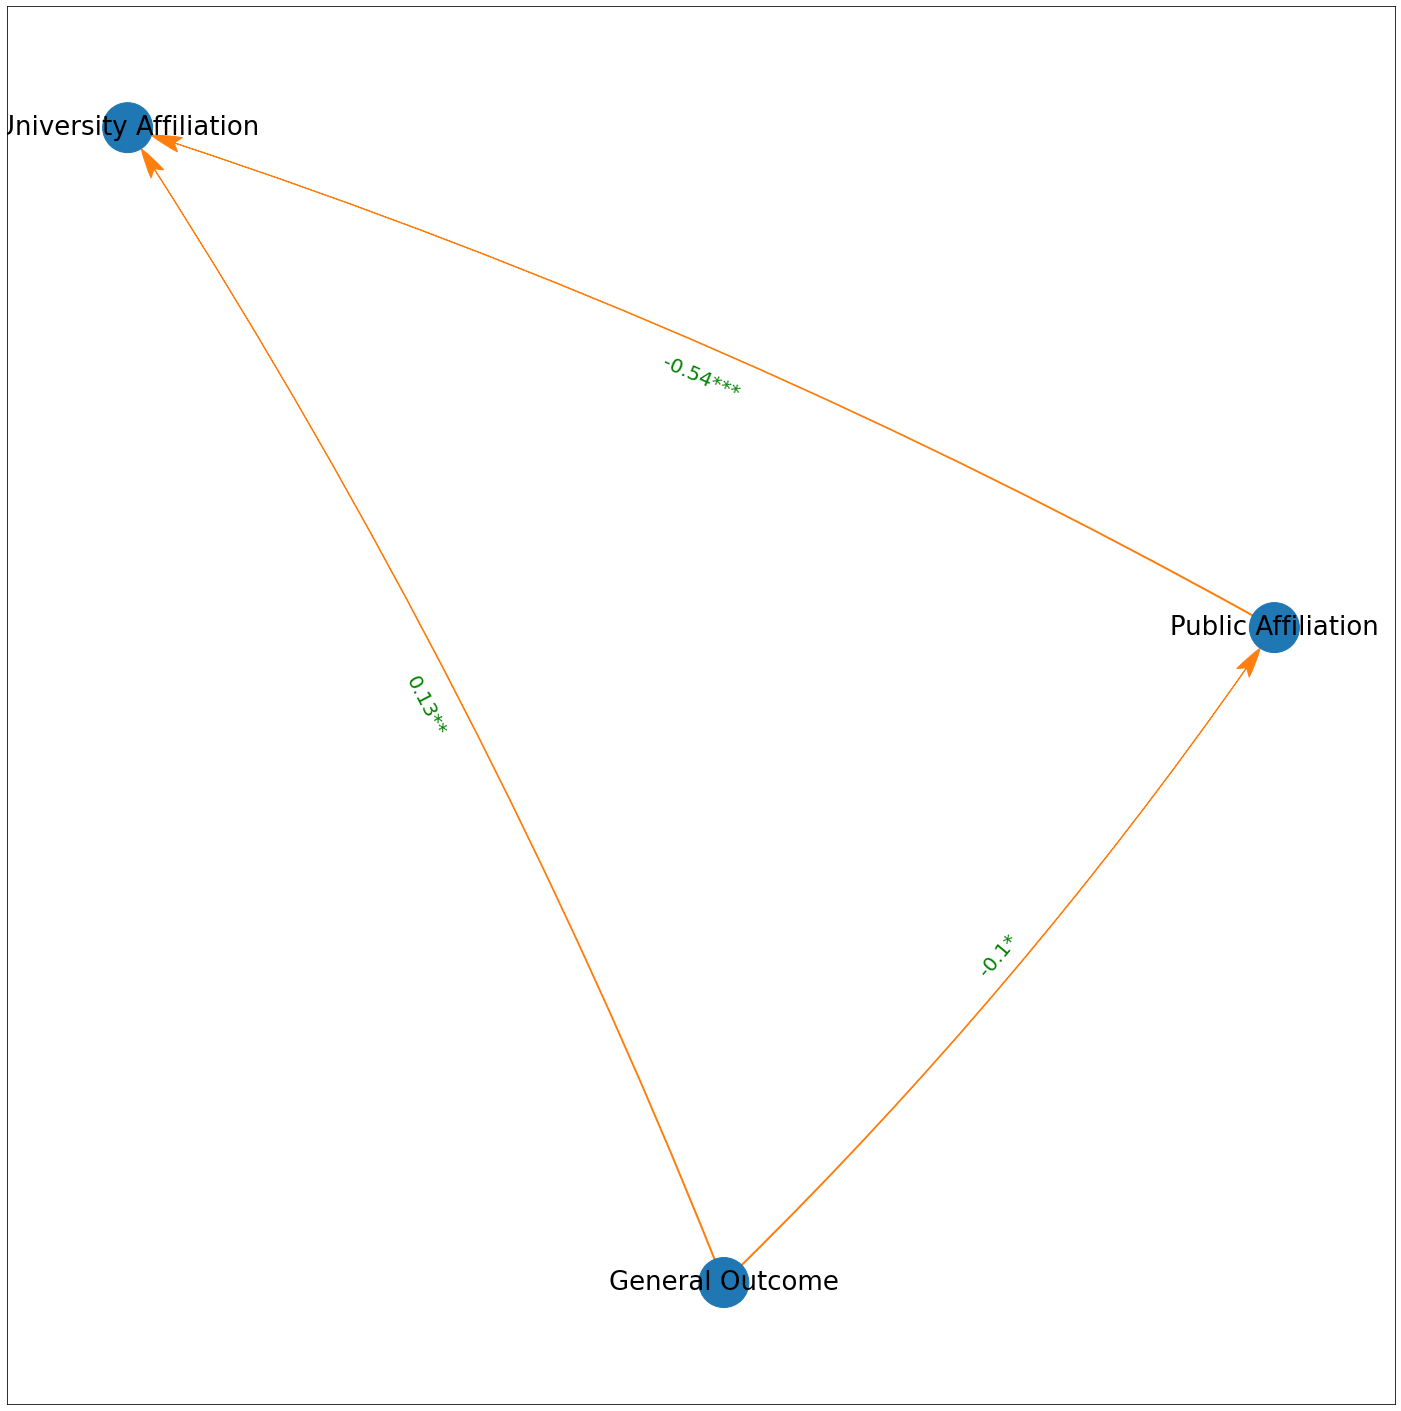

In [51]:
import pandas as pd
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import networkx as nx
import pingouin
from linearmodels.system import SUR

def graph_DAG(edges, 
              df, #df used to generate DAG
              #pp, #PdfPages() object 
              edge_labels = False, # Dictinary with numerical values
              sig_vals = [.05,.01,.001],
              title = ""):
    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)                
#             print(edge, keep_controls)
            pcorr = df.partial_corr(x = edge[0], y = edge[1], covar=keep_controls,
                                  method = "pearson")
            label = str(round(pcorr["r"][0],2))
            pvalue = pcorr["p-val"][0]
#             pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#             label = pcorr[edge[0]].loc[edge[1]]

            for sig_val in sig_vals:
                if pvalue < sig_val: 
                    label = label + "*"   
            
            edge_labels[edge] = label
        return edge_labels
    graph = nx.DiGraph()
    if edge_labels == False:
        edge_labels = build_edge_labels(edges, 
                                        df, 
                                        sig_vals=sig_vals) 
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,20))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 2500,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     connectionstyle='arc3, rad = 0.05',
                     ax = ax)
    
    plt.title(title, fontsize = 30)
#     print(edge_labels)
    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:  
            if (v,u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u,v]}\n\n\n{edge_labels[(v,u)]}'))  
        if (v,u) not in edge_labels.keys():
            edge_labels2.append(((u,v,), f'{edge_labels[(u,v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='C2')
    
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    #pp.savefig(fig, bbox_inches = "tight")  
    plt.show()
    plt.close()

# https://pgmpy.org/structure_estimator/pc.html
def DAG(dag_data, 
        variant, #"orig", "stable", "parallel"
        ci_test, # ”chi_square”, "pearsonr"
        sig): #pvalue cutoff e.g 0.05, 0.1, 0.2
    c = PC(dag_data)
#     edges = c.skeleton_to_pdag(*c.build_skeleton())
    max_cond_vars = len(dag_data.keys()) - 2
    model = c.estimate(return_type = "pdag",variant= variant, 
                       significance_level = sig, 
                       max_cond_vars = max_cond_vars, 
                       ci_test = ci_test)
    edges = model.edges()
    
    return edges
plt.close()
graph_DAG(edges, data_reg)

In [12]:
X_vars = [#'Num Citations',
       "Impact F Publishing Year",
      #"Private",
      #"Public",
       #"International",
       #"University",
       #"Num Citations",
      #'Private Affiliation',
      #'Public Affiliation',
      #'University Affiliation',
       "Herbicide Use/Year"
         ]
y_var = ["General Outcome"]

In [13]:
import statsmodels.api as sm
import numpy
residuals = {}
partial_corr = {}
reg_df = data_reg[keys].dropna()[:-1]
X= reg_df[X_vars]
X["constant"] = 1
y = reg_df[y_var]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
predict = results.predict()
reg_df["predict"] = predict
#residuals[y_var] = results.resid

KeyError: "None of [Index(['Impact F Publishing Year', 'Herbicide Use/Year'], dtype='object')] are in the [columns]"

In [ ]:
import statsmodels.api as sm
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

In [ ]:
X_vars2 = [#'Num Citations',
       "Impact F Publishing Year",
       "Private",
      #"Public",
       #"International",
       #"University",
       #"Num Citations",
      #'Private Affiliation',
      'Public Affiliation',
      #'University Affiliation',
       "Herbicide Use/Year",
       "General Outcome"
         ]
y_var2 = ["Public"]



In [ ]:
import statsmodels.api as sm
import numpy
residuals = {}
partial_corr = {}
reg_df = data_reg[keys].dropna()[:-1]
X= reg_df[X_vars2]
X["constant"] = 1
y = reg_df[y_var2]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
predict = results.predict()
reg_df["predict"] = predict
#residuals[y_var] = results.resid

In [ ]:
import statsmodels.api as sm
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())